In [12]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC # SVM Classifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import seaborn as sns
import pandas as pd

### 혼동 행렬(Confusion matrix)
분류 문제에서 모델을 학습시킨 뒤, 모델에서 데이터의 X값을 집어넣어 얻은 예상되는 y값과,<br> 실제 데이터의 y값을 비교하여 정확히 분류 되었는지 확인하는 메트릭(metric)

* True Positive (TP) : 실제 값은 Positive, 예측된 값도 Positive.
* False Positive (FP) : 실제 값은 Negative, 예측된 값은 Positive.
* False Negative (FN) : 실제 값은 Positive, 예측된 값은 Negative.
* True Negative (TN) : 실제 값은 Negative, 예측된 값도 Negative.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
[[17  0  2]
 [ 1 20  1]
 [ 1  7  5]]
Confusion matrix :
 [[17  0  2]
 [ 1 20  1]
 [ 1  7  5]]
Normalized confusion matrix :
 [[0.89473684 0.         0.10526316]
 [0.04545455 0.90909091 0.04545455]
 [0.07692308 0.53846154 0.38461538]]


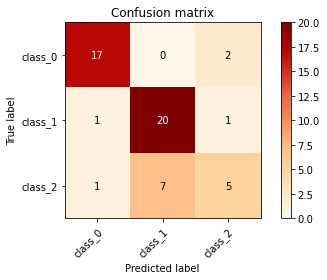

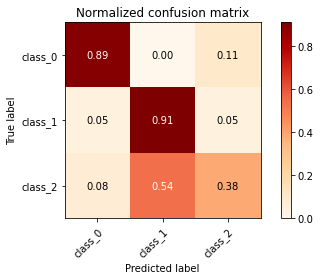

In [9]:
def load_data():
    data = load_wine()
    print(data.keys())
    # X, y = load_wine(return_X_y = True)
    X = data['data']
    y = data['target']
    class_names = data['target_names']
    feature_names = data['feature_names']
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =0.3, random_state=0)
    
    return train_X, test_X, train_y, test_y, class_names


# Confusion matrix 시각화
def plot_confusion_matrix(cm, y_true, y_pred, classes, normalize=False, cmap=plt.cm.OrRd):
    # cm ? = Confusion matrix                     
    title = ""
    if normalize:
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix'
    
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        # 정규화 할 때는 모든 값을 더해서 합이 1이 되도록 각 데이터를 스케일링 한다.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(title, ":\n", cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # label을 45도 회전해서 보여주도록 변경
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # confusion matrix 실제 값 뿌리기
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    plt.savefig('confusion matrix.png')
     
        
def main():
    
    train_X, test_X, train_y, test_y, class_names = load_data()
    
    # SVM 모델로 분류기를 생성하고 학습합니다.
    classifier = SVC()
    y_pred = classifier.fit(train_X, train_y).predict(test_X)
    
    cm = confusion_matrix(test_y,y_pred)
    print(cm)
    
    # seaborn ver 
    # ax = sns.heatmap(cm)
    # plt.savefig('confusion_matrix.png')
    # ### 
    
    plot_confusion_matrix(cm, test_y, y_pred, classes=class_names)

    # 정규화 된 혼동 행렬을 시각화
    # normalize = True
    plot_confusion_matrix(cm, test_y, y_pred, classes=class_names, normalize = True)
    
    return cm
    
if __name__ == "__main__":
    main()

### 정확도(accuracy), 정밀도(precision), 재현율(recall)
분류 알고리즘 평가 지표

* 정확도 (accuracy) =

 

* 정밀도 (precision) =


* 재현율 (recall) =


In [13]:
def main():
    # 실제 값
    y_true = pd.Series(
        ["not mafia", "not mafia", "mafia", "not mafia", "mafia", 
        "not mafia", "not mafia", "mafia", "not mafia", "not mafia"]
        )
    # 예측된 값
    y_pred = pd.Series(
        ["mafia", "mafia", "not mafia", "not mafia", "mafia", 
        "not mafia", "not mafia", "mafia", "not mafia", "not mafia"]
        )

    print("1. 혼동 행렬 :\n",pd.crosstab(y_true, y_pred, rownames=['실제'], colnames=['예측'], margins=True))
    
    """정확도를 구할 때 실제 값과 예측 값이 일치하는지 비교할 때
    문자열 끼리 비교한다면 데이터가 많아질때 자원이 많이 들 수 있다. 
    그래서 문자열을 카테고리화로 숫자화 시켜서 비교하는 것이 좋다.
    pandas categorical을 이용"""
    
    
    y_true = pd.Categorical(y_true, categories=['not mafia','mafia']).codes
    y_pred = pd.Categorical(y_pred, categories=['not mafia','mafia']).codes
    # not mafia = class_0, mafia = class_1
    
    """
    1. 실행 버튼을 클릭하여 
       마피아(mafia)와 시민(not mafia)으로 분류된 혼동 행렬을 확인합니다.
    """
    
    """
    2. 실행 결과값을 토대로 
       마피아를 제대로 분석했는 지에 대한 
       accuracy, precision, recall을 구합니다.
    """
    accuracy = ( y_true == y_pred ).sum()/ len(y_true) # 맞은 것 / 전체 데이터 수
    # print( y_true == y_pred ) : 각각의 인덱스를 비교하는 array 형식
            
    precision = (( y_pred ==1 ) & ( y_true==1 )).sum() / (y_pred == 1).sum() # (1이라고 예측했으며 실제로도 1인 데이터 수) / (모델이 1이라고 예측한 데이터 수)
    ## np.logical_and()
    precision = np.logical_and(y_pred==1, y_true==1).sum() / (y_pred == 1).sum() 
    
    recall = (( y_true==1 ) & ( y_pred ==1 )).sum()/ (y_true == 1).sum() # (실제 값이 1이며 1이라고 예측한 데이터 수) / (실제 값이 1인 데이터 수)
    
    print("\naccuracy : ", accuracy)
    print("precision : ", precision)
    print("recall : ", recall)
    
    return accuracy, precision, recall
    
if __name__ == "__main__":
    main()

1. 혼동 행렬 :
 예측         mafia  not mafia  All
실제                              
mafia          2          1    3
not mafia      2          5    7
All            4          6   10

accuracy :  0.7
precision :  0.5
recall :  0.6666666666666666


## 공부 나중에 공부할 것 13:57 2021-10-26

In [ ]:
silhouette_score

In [ ]:
   precision = np.logical_and(y_pred==1, y_true==1).sum() / (y_pred == 1).sum() 

In [ ]:
   y_pred = pd.Categorical(y_pred, categories=['not mafia','mafia']).codes

In [ ]:
 score= model.inertia_

In [ ]:
logreg_sag = LogisticRegression(solver='sag', max_iter=10000)